<a href="https://colab.research.google.com/github/ridhikapila27/Deep_learning/blob/main/Lab2_ANN_r.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1, Loss: 41.030513763427734
Epoch 2, Loss: 28.741317749023438
Epoch 3, Loss: 19.809307098388672
Epoch 4, Loss: 13.457535743713379
Epoch 5, Loss: 9.961636543273926
Epoch 6, Loss: 8.208098411560059
Epoch 7, Loss: 7.3197479248046875
Epoch 8, Loss: 6.841848850250244
Epoch 9, Loss: 6.543554306030273
Epoch 10, Loss: 6.317986965179443
Epoch 11, Loss: 6.123845100402832
Epoch 12, Loss: 5.949304103851318
Epoch 13, Loss: 5.793208122253418
Epoch 14, Loss: 5.6561126708984375
Epoch 15, Loss: 5.536906719207764
Epoch 16, Loss: 5.432898998260498
Epoch 17, Loss: 5.341246128082275
Epoch 18, Loss: 5.259770393371582
Epoch 19, Loss: 5.187002182006836
Epoch 20, Loss: 5.121965408325195
Epoch 21, Loss: 5.063957691192627
Epoch 22, Loss: 5.012368679046631
Epoch 23, Loss: 4.9665608406066895
Epoch 24, Loss: 4.925867080688477
Epoch 25, Loss: 4.889645576477051
Epoch 26, Loss: 4.857330322265625
Epoch 27, Loss: 4.828434944152832
Epoch 28, Loss: 4.802524566650391
Epoch 29, Loss: 4.779193878173828
Epoch 30, Loss: 

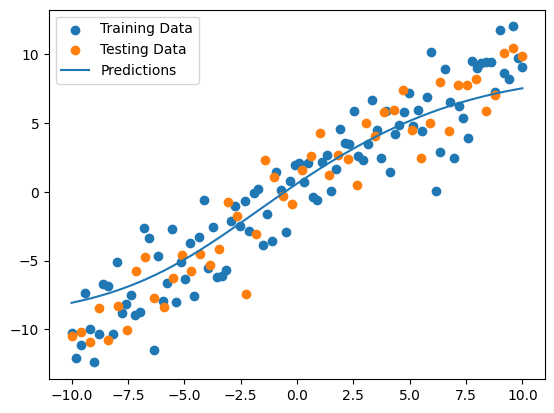

In [1]:
import torch #creates deep neural networks
import torch.nn as nn #nn used for defining modules, graph recording of data
import matplotlib.pyplot as plt

# Define the model
class ANN(nn.Module):
    def __init__(self): #__init__() initializes attributes of class
        super(ANN, self).__init__() #using super() we can use objects of parent class
        self.fc1 = nn.Linear(1, 10) #single layer feed forward network with(n,m) n=inputs,m=outputs
        self.fc2 = nn.Linear(10, 1)
        
    def forward(self, x):
        x = torch.sigmoid(self.fc1(x))
        x = self.fc2(x)
        return x

# Create an instance of the model
model = ANN()

# Define the loss function and optimizer
criterion = nn.MSELoss() #mean square error
optimizer = torch.optim.SGD(model.parameters(), lr=0.1) #stochastic gradient descent

# Generate some fake data for training
x_train = torch.linspace(-10, 10, 100).reshape(-1, 1)
y_train = x_train + torch.randn(x_train.shape) * 2

# Train the model
for epoch in range(100):
    optimizer.zero_grad()
    y_pred = model(x_train)
    loss = criterion(y_pred, y_train)
    loss.backward()
    optimizer.step()
    if (epoch+1) % 1 == 0:
        print(f"Epoch {epoch+1}, Loss: {loss.item()}")

# Generate some fake data for testing
x_test = torch.linspace(-10, 10, 50).reshape(-1, 1)
y_test = x_test + torch.randn(x_test.shape) * 2

# Make predictions on the test data
y_pred = model(x_test)

# Plot the results
plt.scatter(x_train.numpy(), y_train.numpy(), label="Training Data")
plt.scatter(x_test.numpy(), y_test.numpy(), label="Testing Data")
plt.plot(x_test.numpy(), y_pred.detach().numpy(), label="Predictions")
plt.legend()
plt.show()
